<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/Dilated_CNN_model_for_short_term_power_forecasting_Kaggle_turkey_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [24]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import seaborn as sns
import io
import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

# **Dataframe** 

In [15]:
url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset

# **Reading the dataset**

In [16]:
df = pd.read_csv(url10)
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99
1,01 01 2018 00:10,453.77,5.67,519.92,268.64
2,01 01 2018 00:20,306.38,5.22,390.90,272.56
3,01 01 2018 00:30,419.65,5.66,516.13,271.26
4,01 01 2018 00:40,380.65,5.58,491.70,265.67
...,...,...,...,...,...
50525,31 12 2018 23:10,"2,963.98",11.40,"3,397.19",80.50
50526,31 12 2018 23:20,"1,684.35",7.33,"1,173.06",84.06
50527,31 12 2018 23:30,"2,201.11",8.44,"1,788.28",84.74
50528,31 12 2018 23:40,"2,515.69",9.42,"2,418.38",84.30


 **Dataframe column rename**

In [17]:
col_0=(df.columns)[0]
col_1=(df.columns)[1]
col_2=(df.columns)[2]
feature_0 = 'Date & Time'
feature_1 = 'Active Power'
feature_2 = 'Wind speed'
df.rename(columns={col_0 : feature_0 , col_1 : feature_1 , col_2 : feature_2},inplace=True)
df

,Date & Time,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99
1,01 01 2018 00:10,453.77,5.67,519.92,268.64
2,01 01 2018 00:20,306.38,5.22,390.90,272.56
3,01 01 2018 00:30,419.65,5.66,516.13,271.26
4,01 01 2018 00:40,380.65,5.58,491.70,265.67
...,...,...,...,...,...
50525,31 12 2018 23:10,"2,963.98",11.40,"3,397.19",80.50
50526,31 12 2018 23:20,"1,684.35",7.33,"1,173.06",84.06
50527,31 12 2018 23:30,"2,201.11",8.44,"1,788.28",84.74
50528,31 12 2018 23:40,"2,515.69",9.42,"2,418.38",84.30


**Convert the date column to datetime object**

In [18]:
df['Date & Time'] = pd.to_datetime(df['Date & Time']) 
df

,Date & Time,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67
...,...,...,...,...,...
50525,2018-12-31 23:10:00,"2,963.98",11.40,"3,397.19",80.50
50526,2018-12-31 23:20:00,"1,684.35",7.33,"1,173.06",84.06
50527,2018-12-31 23:30:00,"2,201.11",8.44,"1,788.28",84.74
50528,2018-12-31 23:40:00,"2,515.69",9.42,"2,418.38",84.30


**Active power convert to =>MW**

In [19]:
df[feature_1]=df[feature_1].div(1000)
df

,Date & Time,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,0.38,5.31,416.33,259.99
1,2018-01-01 00:10:00,0.45,5.67,519.92,268.64
2,2018-01-01 00:20:00,0.31,5.22,390.90,272.56
3,2018-01-01 00:30:00,0.42,5.66,516.13,271.26
4,2018-01-01 00:40:00,0.38,5.58,491.70,265.67
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2.96,11.40,"3,397.19",80.50
50526,2018-12-31 23:20:00,1.68,7.33,"1,173.06",84.06
50527,2018-12-31 23:30:00,2.20,8.44,"1,788.28",84.74
50528,2018-12-31 23:40:00,2.52,9.42,"2,418.38",84.30


**set the index to the Date time column**

In [20]:
df.set_index(feature_0,inplace=True) 

# **Exploratory Data Analysis (EDA)**

In [21]:
df.describe()

,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
count,"50,530.00","50,530.00","50,530.00","50,530.00"
mean,1.31,7.56,"1,492.18",123.69
std,1.31,4.23,"1,368.02",93.44
min,-0.00,0.00,0.00,0.00
25%,0.05,4.20,161.33,49.32
50%,0.83,7.10,"1,063.78",73.71
75%,2.48,10.30,"2,964.97",201.70
max,3.62,25.21,"3,600.00",360.00


In [25]:
df.isnull().sum()

Active Power                     0
Wind speed                       0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

**Visualization**

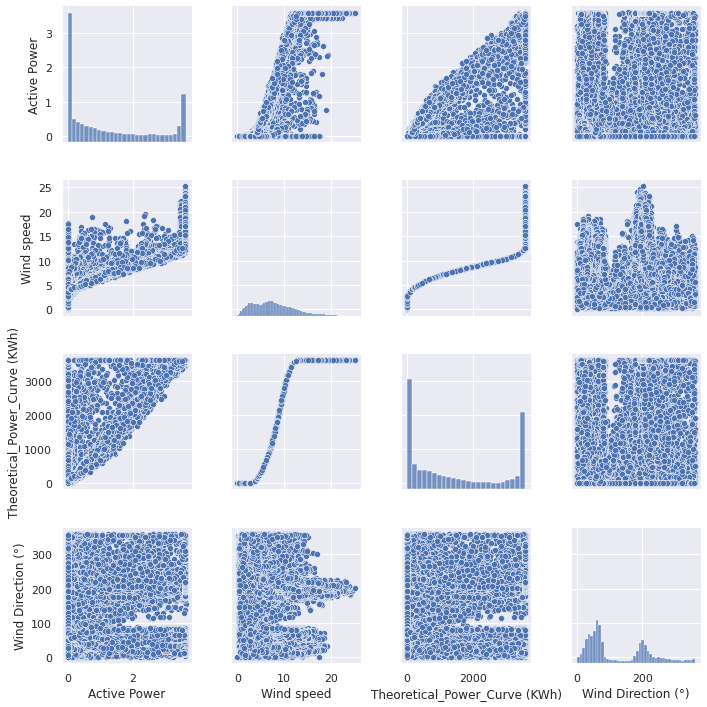

In [27]:
sns.pairplot(df)

**correlation between the values**

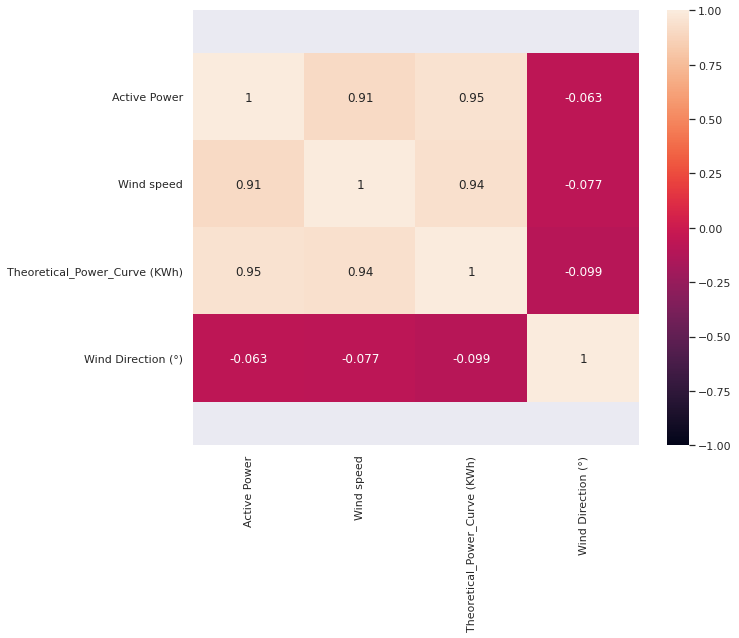

,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
Active Power,1.00,0.91,0.95,-0.06
Wind speed,0.91,1.00,0.94,-0.08
Theoretical_Power_Curve (KWh),0.95,0.94,1.00,-0.10
Wind Direction (°),-0.06,-0.08,-0.10,1.00


In [29]:
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

**KDE plots**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

IndexError: ignored

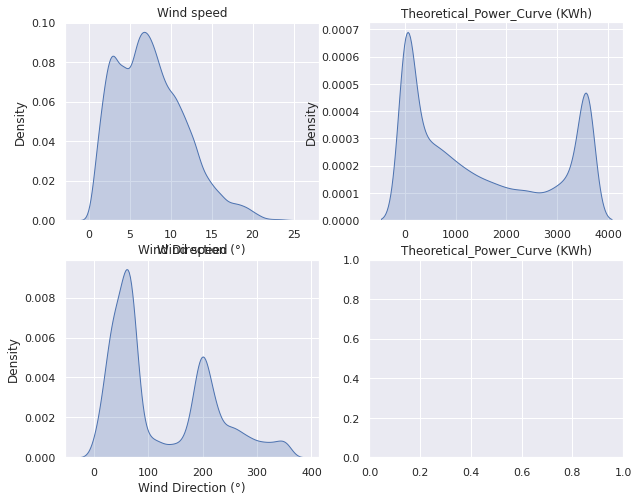

In [35]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.iloc[:,i+1], shade=True)
    plt.title(df.columns[i+1])
plt.tight_layout()
plt.show()

# **Train an validation data set**

In [36]:
df=pd.DataFrame(df)
df_temp=df.copy()

In [37]:
df_temp

,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
Date & Time,,,,
2018-01-01 00:00:00,0.38,5.31,416.33,259.99
2018-01-01 00:10:00,0.45,5.67,519.92,268.64
2018-01-01 00:20:00,0.31,5.22,390.90,272.56
2018-01-01 00:30:00,0.42,5.66,516.13,271.26
2018-01-01 00:40:00,0.38,5.58,491.70,265.67
...,...,...,...,...
2018-12-31 23:10:00,2.96,11.40,"3,397.19",80.50
2018-12-31 23:20:00,1.68,7.33,"1,173.06",84.06
2018-12-31 23:30:00,2.20,8.44,"1,788.28",84.74


In [38]:
df=df_temp[0:5000] #8/1/2021 0:00 to 9/30/2021 23:50

In [39]:
df

,Active Power,Wind speed,Theoretical_Power_Curve (KWh),Wind Direction (°)
Date & Time,,,,
2018-01-01 00:00:00,0.38,5.31,416.33,259.99
2018-01-01 00:10:00,0.45,5.67,519.92,268.64
2018-01-01 00:20:00,0.31,5.22,390.90,272.56
2018-01-01 00:30:00,0.42,5.66,516.13,271.26
2018-01-01 00:40:00,0.38,5.58,491.70,265.67
...,...,...,...,...
2018-09-02 04:20:00,1.90,8.53,"1,849.17",211.84
2018-09-02 04:30:00,2.08,9.00,"2,146.02",220.82
2018-09-02 04:40:00,1.98,8.98,"2,129.14",218.75


**Divide train and validation sets**

In [40]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation**

In [41]:
T = 6
HORIZON = 1

In [42]:
scaler = MinMaxScaler()
train=pd.DataFrame(train[feature_1])
train[feature_1] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted[feature_1].shift(-1)
train_shifted.head(10)

,Active Power,y_t+1
Date & Time,,
2018-01-01 00:00:00,0.11,0.13
2018-01-01 00:10:00,0.13,0.09
2018-01-01 00:20:00,0.09,0.12
2018-01-01 00:30:00,0.12,0.11
2018-01-01 00:40:00,0.11,0.11
2018-01-01 00:50:00,0.11,0.12
2018-01-01 01:00:00,0.12,0.11
2018-01-01 01:10:00,0.11,0.13
2018-01-01 01:20:00,0.13,0.12


**Creating input data to model (Getting T lagged vaules)**

In [43]:
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[feature_1].shift(T-t)
train_shifted = train_shifted.rename(columns={feature_1:'Current_active_power'})

# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
#train_shifted.head(10)

**Train input and target arrays**

In [44]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [45]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [ ]:
#print(y_train.shape)
#print(X_train.shape)

**Data preparation - Validation data**

In [46]:
valid=pd.DataFrame(valid[feature_1])
valid_new=df[valid_start-T+1:] #Add T values beforehand to the validation set
valid_new=pd.DataFrame(valid_new[feature_1])
valid_new.head(20)

,Active Power
Date & Time,
2018-02-02 05:40:00,3.60
2018-02-02 05:50:00,3.60
2018-02-02 06:00:00,3.60
2018-02-02 06:10:00,3.60
2018-02-02 06:20:00,3.60
2018-02-02 06:30:00,3.60
2018-02-02 06:40:00,3.60
2018-02-02 06:50:00,3.60
2018-02-02 07:00:00,3.60


In [47]:
valid_new[feature_1]=scaler.transform(valid_new)

#Validataion set preparation(Lagged values,create input and target arrays,reshape)]

valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted[feature_1].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[feature_1].shift(T-t)
vali_shifted = valid_shifted.rename(columns={feature_1:'Current_active_power'})

valid_shifted = valid_shifted.dropna(how='any')

y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

In [ ]:
#print(y_valid.shape)
#print(X_valid.shape)

# **Implement the Deep learning model**

In [48]:
from keras.models import Model, Sequential
from keras.layers import GRU, Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# UNITS = 5 # number of units in the RNN layer
# BATCH_SIZE = 32 # number of samples per mini-batch
# EPOCHS = 25 # maximum number of times the training algorithm will cycle through all samples

In [49]:
LATENT_DIM = 10
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 30

In [50]:
model = Sequential()
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
#model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=8))
model.add(Flatten())
model.add(Dense(HORIZON, activation='linear'))

In [52]:
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 10)             30        
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 10)             210       
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 10)             210       
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [53]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [54]:
best_val = ModelCheckpoint('model_{epoch:02d}.h5', save_best_only=True, mode='min', period=1)

In [55]:
history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop, best_val],
          verbose=1)

Epoch 1/30
125/125 [==============================] - 2s 5ms/step - loss: 0.0652 - val_loss: 0.0159
Epoch 2/30
125/125 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 3/30
125/125 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0103
Epoch 4/30
125/125 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0096
Epoch 5/30
125/125 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 6/30
125/125 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0075
Epoch 7/30
125/125 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 8/30
125/125 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 9/30
125/125 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0065
Epoch 10/30
125/125 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0059

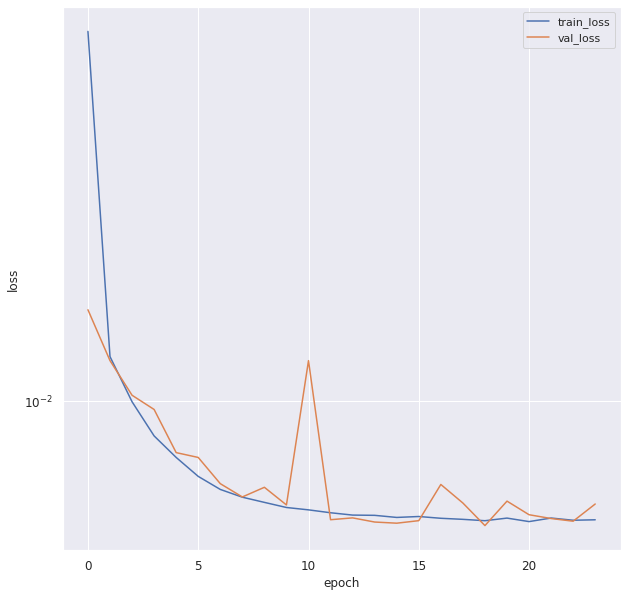

In [56]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Save the weights
# path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU/model.h5'
# model.save(path)

# **Evaluate the model**

**Load test data set**

In [ ]:
#df_test = pd.read_csv(url11)
#df_test=pd.DataFrame(df_test)

In [ ]:
#df_test=df_test.drop(0)
#df_test=df_test.head(200)
df_temp.loc[5000]

Date & Time         9/5/2021 2:40
Active Power               100.79
Forecasted Power           101.87
Name: 5000, dtype: object

In [57]:
test_set_1 = df_temp[5000:5200]  #10/1/2021 00:00 to 10/10/2021 23:50
test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

dataset_index=1

if dataset_index==1:
  df_test = test_set_1
elif dataset_index==2:
  df_test = test_set_2
elif dataset_index==3:
  df_test = test_set_3



In [58]:
count = (df_test[feature_1] == 0).sum()
count

52

**Preprocessing technique**

In [61]:
df_test[feature_1]=df_test[feature_1].replace(0,df_test[feature_1].median())
# df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [62]:
scaler = MinMaxScaler()
test=pd.DataFrame(df_test[feature_1])
test[feature_1] = scaler.fit_transform(test)


In [63]:

test_shifted = test.copy()
test_shifted['y_t+1'] = test_shifted[feature_1].shift(-1)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[feature_1].shift(T-t)
test_shifted = test_shifted.rename(columns={feature_1:'Current_active_power'})

forecasted_values=np.array(df_test[feature_1])
test_shifted[feature_1] = forecasted_values
#test_shifted

In [64]:
test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted['y_t+1'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)
#X_test

In [65]:
print(y_test.shape)
print(X_test.shape)

(194,)
(194, 6, 1)


In [67]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

       0
0   0.37
1   0.42
2   0.48
3   0.36
4   0.23
..   ...
189 0.07
190 0.05
191 0.08
192 0.32
193 0.25

[194 rows x 1 columns]


In [68]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['Date & Time'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='Date & Time', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 
eval_df

,Date & Time,h,prediction,actual
0,2018-09-02 06:00:00,t+1,0.37,0.43
1,2018-09-02 06:10:00,t+1,0.42,0.49
2,2018-09-02 06:20:00,t+1,0.48,0.40
3,2018-09-02 06:30:00,t+1,0.36,0.26
4,2018-09-02 06:40:00,t+1,0.23,0.06
...,...,...,...,...
189,2018-10-02 13:30:00,t+1,0.07,0.03
190,2018-10-02 13:40:00,t+1,0.05,0.06
191,2018-10-02 13:50:00,t+1,0.08,0.32
192,2018-10-02 14:00:00,t+1,0.32,0.26


In [69]:
eval_df[['prediction']]=scaler.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scaler.inverse_transform(np.array(eval_df[['actual']]))
eval_df

,Date & Time,h,prediction,actual
0,2018-09-02 06:00:00,t+1,0.98,1.13
1,2018-09-02 06:10:00,t+1,1.10,1.29
2,2018-09-02 06:20:00,t+1,1.24,1.05
3,2018-09-02 06:30:00,t+1,0.93,0.68
4,2018-09-02 06:40:00,t+1,0.60,0.15
...,...,...,...,...
189,2018-10-02 13:30:00,t+1,0.17,0.07
190,2018-10-02 13:40:00,t+1,0.13,0.17
191,2018-10-02 13:50:00,t+1,0.21,0.84
192,2018-10-02 14:00:00,t+1,0.83,0.69


**MAPE of our model**

In [70]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

933.2506285217896

**RMSE of our model**

In [71]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

actual = eval_df['actual']
pred = eval_df['prediction']

rmse(actual, pred)

0.19252121240378653

In [72]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="Dilated model:Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

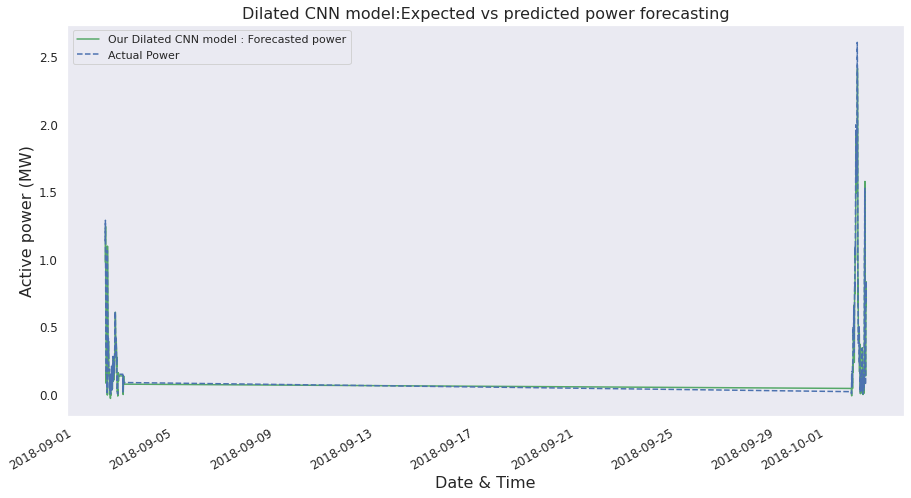

In [74]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("Dilated CNN model:Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Our Dilated CNN model : Forecasted power', 'Actual Power'])
# plt.savefig("GRU-results.pdf")
# plt.savefig("GRU-results.png")
plt.show()